**Paquetes necesarios**

In [32]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy import stats
from statsmodels.stats.diagnostic import lilliefors
from statsmodels.graphics.tsaplots import plot_pacf
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

**Lectura de datos**

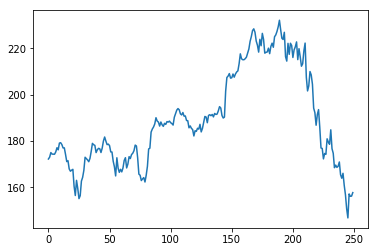

In [24]:
X = pd.read_csv('precios.csv', index_col=0)
X = X.values
X = np.array(X)
plt.plot(X)
plt.show()

**Retornos**

In [39]:
N = len(X)
R = np.zeros(N)
# Retornos instantáneos
for j in range(1,N):
        R[j-1] = (X[j] - X[j-1])/X[j-1]

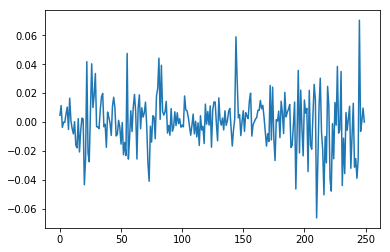

In [40]:
plt.plot(R)

**Test de normalidad**

In [21]:
jb = stats.jarque_bera(R)
lilie = lilliefors(R)
shapiro = stats.shapiro(R)

In [22]:
df = pd.DataFrame()
df['Jarque Bera'] = [1 if jb[1]<0.03 else 0]
df['Shapiro Wilks'] = [1 if shapiro[1]<0.03 else 0]
df['Lilliefors'] = [1 if lilie[1]<0.05 else 0]
df

,Jarque Bera,Shapiro Wilks,Lilliefors
0,1,1,1


**Dimensión Fractal**

In [23]:
def hFD(a, k_max): 
# Higuchi FD
    L = []
    x = []
    N = len(a)

    for k in range(1,k_max):
        Lk = 0
        for m in range(0,k):
            #we pregenerate all idxs
            idxs = np.arange(1,int(np.floor((N-m)/k)),dtype=np.int32)
            Lmk = np.sum(np.abs(a[m+idxs*k] - a[m+k*(idxs-1)]))
            Lmk = (Lmk*(N - 1)/(((N - m)/ k)* k)) / k
            Lk += Lmk

        L.append(np.log(Lk/(m+1)))
        x.append([np.log(1.0/ k), 1])

    (p, r1, r2, s)=np.linalg.lstsq(x, L)
    return p[0]

In [25]:
hFD(X,8)

1.4869152889291897

**Coeficiente de Hurst**

In [26]:
def hurst(signal):
    tau = []; lagvec = []

    #  Step through the different lags
    for lag in range(2,20):

    #  produce price difference with lag
        pp = np.subtract(signal[lag:],signal[:-lag])

    #  Write the different lags into a vector
        lagvec.append(lag)

    #  Calculate the variance of the difference vector
        tau.append(np.std(pp))

    #  linear fit to double-log graph (gives power)
    m = np.polyfit(np.log10(lagvec),np.log10(tau),1)

    # calculate hurst
    hurst = m[0]

    return hurst

In [27]:
hurst(X)

0.5340311005683891

**PACF**

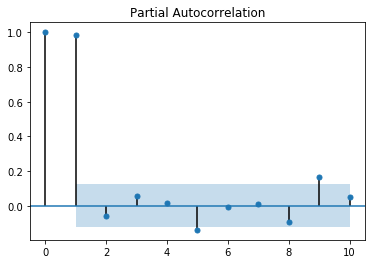

In [36]:
plot_pacf(X,lags=10)
plt.show()

**Estimación de parámetros**

In [37]:
dt = 1/252
media = np.mean(R)
varianza = np.var(R)
mu = media/dt
sigma = np.sqrt(varianza/dt)
print('mu: '+str(mu)+'\n'+'sigma: '+str(sigma))

mu: -0.047365409456132865
sigma: 0.2868958144070719


In [55]:
# Parametros
N = 250
dt = 1/252
#mu = 0.5
sg = sigma
# Condicion inicial
X0 = X[0]
k = 100
S = np.zeros((k,N))
S[0] = X0
for i in range(k):
    for j in range(1,N):
        S[i,j] = X[j-1] + mu*X[j-1]*dt + sg*X[j-1]*np.sqrt(dt)*np.random.normal()

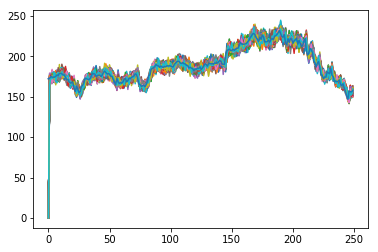

In [57]:
plt.plot(S.T)
plt.plot(X)
plt.show()

In [58]:
S[0]

array([172.22999573, 173.78575459, 175.01519311, 177.17872839,
       172.7991076 , 172.50442296, 175.90641411, 175.88910349,
       176.01005785, 177.27892825, 173.15884433, 173.94841466,
       179.02960541, 177.60250464, 178.08090444, 175.28406032,
       167.334891  , 171.30351913, 167.9019765 , 169.96703686,
       175.18064814, 159.83729935, 165.92342545, 157.11450402,
       157.29256252, 159.52731768, 161.04474464, 155.75576197,
       162.58991927, 162.21916363, 167.70296581, 171.10512236,
       172.8038868 , 174.59793612, 175.99897528, 174.27881997,
       178.80213986, 180.96523755, 178.76010062, 179.67755873,
       175.68392524, 176.20694216, 177.02247655, 175.58100139,
       175.98833497, 179.65967909, 177.40248996, 178.5165998 ,
       178.94728355, 183.21332645, 176.70784361, 178.43054249,
       173.24406284, 170.81157172, 169.12399708, 176.20077108,
       160.82822664, 178.83223091, 171.09698696, 161.44776124,
       171.76877198, 166.24204899, 166.02945501, 171.25